<H1>This assignment explores the effect of convolution stride on the performance of a Convolutional Neural Network (CNN).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers, utils, datasets

In [2]:
NUM_CLASSES = 10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test  = utils.to_categorical(y_test, NUM_CLASSES)

/Users/priyarajni/Desktop/Pythoncode/MSAI-630-A02/venvMLP/lib/python3.13/site-packages/keras/src/datasets/cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")


In [3]:
def build_cnn(stride_value: int):
    """
    Simple CNN where the first conv uses a configurable stride.
    stride_value=2 matches the "stride = 2" idea demonstrated in convolutions.ipynb.
    """
    input_layer = layers.Input(shape=(32, 32, 3))

    # Conv block 1 (stride is the experiment variable)
    x = layers.Conv2D(32, (3, 3), strides=stride_value, padding="same", activation="relu")(input_layer)
    x = layers.MaxPooling2D((2, 2))(x)

    # Conv block 2 (kept constant for fairness)
    x = layers.Conv2D(64, (3, 3), strides=1, padding="same", activation="relu")(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Classifier head
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation="relu")(x)
    output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

    model = models.Model(input_layer, output_layer)

    opt = optimizers.Adam(learning_rate=0.0005)
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    return model

In [4]:
def train_and_eval(model, name, epochs=10, batch_size=64):
    print("\n" + "="*60)
    print(f"Training: {name}")
    print("="*60)

    history = model.fit(
        x_train, y_train,
        validation_split=0.1,
        epochs=epochs,
        batch_size=batch_size,
        shuffle=True,
        verbose=1
    )

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"\n{name} -> Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")
    return history, test_loss, test_acc

In [5]:
model_stride2 = build_cnn(stride_value=2)
hist2, loss2, acc2 = train_and_eval(model_stride2, "Original (stride=2)")


Training: Original (stride=2)
Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3905 - loss: 1.7024 - val_accuracy: 0.4478 - val_loss: 1.5230
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5083 - loss: 1.3838 - val_accuracy: 0.5238 - val_loss: 1.3482
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5590 - loss: 1.2551 - val_accuracy: 0.5840 - val_loss: 1.1808
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5920 - loss: 1.1576 - val_accuracy: 0.6052 - val_loss: 1.1233
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6174 - loss: 1.0930 - val_accuracy: 0.6184 - val_loss: 1.0918
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6358 - loss: 1.0407 - val_accuracy: 0.6454 - val_loss: 1.0276
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6515 - loss: 0.9989 - val_accuracy: 0.6438 - val_loss: 1.0119
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6654 - 

In [6]:
MY_STRIDE = 1   # <--- Change this to 3 if you want a stronger contrast (faster, lower detail)
model_custom = build_cnn(stride_value=MY_STRIDE)
hist_custom, loss_custom, acc_custom = train_and_eval(model_custom, f"Custom (stride={MY_STRIDE})")


Training: Custom (stride=1)
Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.4384 - loss: 1.5698 - val_accuracy: 0.5504 - val_loss: 1.2917
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.5758 - loss: 1.2059 - val_accuracy: 0.6030 - val_loss: 1.1401
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.6293 - loss: 1.0632 - val_accuracy: 0.6336 - val_loss: 1.0643
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.6606 - loss: 0.9723 - val_accuracy: 0.6620 - val_loss: 0.9747
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.6895 - loss: 0.8984 - val_accuracy: 0.6762 - val_loss: 0.9431
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.7100 - loss: 0.8382 - val_accuracy: 0.6828 - val_loss: 0.9171
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.7250 - loss: 0.7896 - val_accuracy: 0.6988 - val_loss: 0.8947
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accur

In [7]:
print("\n\nFinal Comparison")
print("-"*60)
print(f"{'Model':25s} {'Stride':>8s} {'Test Acc':>10s} {'Test Loss':>10s}")
print("-"*60)
print(f"{'Original':25s} {2:>8d} {acc2:>10.4f} {loss2:>10.4f}")
print(f"{'Custom':25s} {MY_STRIDE:>8d} {acc_custom:>10.4f} {loss_custom:>10.4f}")
print("-"*60)



Final Comparison
------------------------------------------------------------
Model                       Stride   Test Acc  Test Loss
------------------------------------------------------------
Original                         2     0.6661     0.9594
Custom                           1     0.7036     0.8666
------------------------------------------------------------


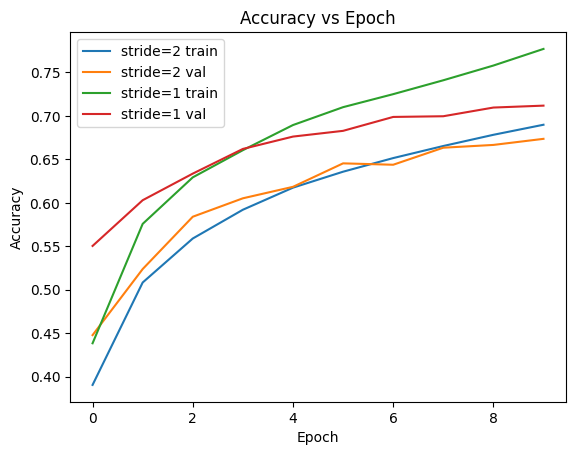

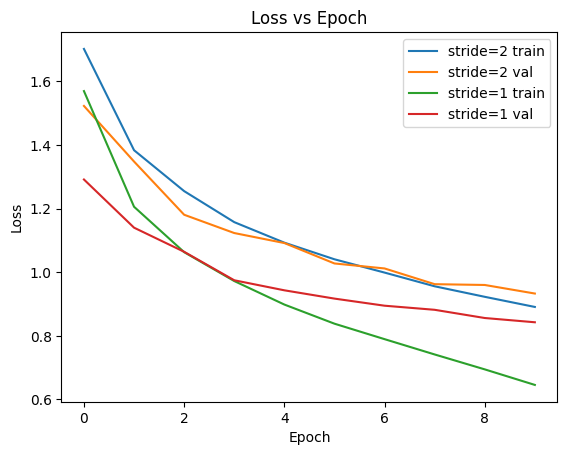

In [8]:
def plot_history(h1, label1, h2, label2):
    # Accuracy
    plt.figure()
    plt.plot(h1.history["accuracy"], label=f"{label1} train")
    plt.plot(h1.history["val_accuracy"], label=f"{label1} val")
    plt.plot(h2.history["accuracy"], label=f"{label2} train")
    plt.plot(h2.history["val_accuracy"], label=f"{label2} val")
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

    # Loss
    plt.figure()
    plt.plot(h1.history["loss"], label=f"{label1} train")
    plt.plot(h1.history["val_loss"], label=f"{label1} val")
    plt.plot(h2.history["loss"], label=f"{label2} train")
    plt.plot(h2.history["val_loss"], label=f"{label2} val")
    plt.title("Loss vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

plot_history(hist2, "stride=2", hist_custom, f"stride={MY_STRIDE}")